In [2]:
import matplotlib.pyplot as plt
import json
import numpy
from scipy.signal import find_peaks, peak_widths, lfilter, lfilter_zi, filtfilt, butter

In [3]:
def load_json(path):
    with open(path, "r") as json_file:
        return json.loads(json_file.read())

In [4]:
VIDEO_ID = "video-33-p_04"
IAOT_PATH = "/Users/gvieira/shan/{}/data/iaot.json".format(VIDEO_ID)

In [72]:
intersection_area_over_time = load_json(IAOT_PATH)
track_index = 1
roi_name = "left_front"

In [73]:
   # Example:
    #
    # [{                    -> track_index = 0
    #     "roi_1": [{       -> roi_name = "roi_1"
    #         "index": 4,   -> index of the frame in the video
    #         "area": 0,    -> intersection area
    #         "bbox": null  -> bbox of the intersection area
    #     }, {
    #         "index": 5,
    #         "area": 0,
    #         "bbox": null
    # ...
    #

In [74]:
iaot = intersection_area_over_time[track_index][roi_name]
X = []
Y = []
for i in range(len(iaot)):
    X.append(iaot[i]["index"])
    Y.append(iaot[i]["area"])

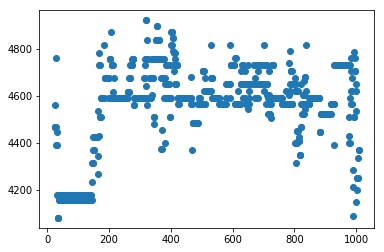

In [75]:
plt.scatter(X, Y)

# Filtering without delay

In [76]:
def smooth_without_delay(xn):
    b, a = butter(1, 0.05)
    # Apply the filter to xn.  Use lfilter_zi to choose the initial condition
    # of the filter.
    zi = lfilter_zi(b, a)
    z, _ = lfilter(b, a, xn, zi=zi*xn[0])
    # Apply the filter again, to have a result filtered at an order
    # the same as filtfilt.
    z2, _ = lfilter(b, a, z, zi=zi*z[0])
    # Use filtfilt to apply the filter.
    return filtfilt(b, a, xn)

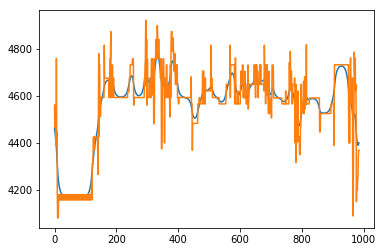

In [77]:
x = numpy.array(X)
y = numpy.array(Y)
smooth_y = smooth_without_delay(y)
plt.plot(smooth_y)
plt.plot(y)

In [70]:
indexes, props = find_peaks(smooth_y, height=300, width=7)

peaks = []
for i in range(len(indexes)):
    frame_index = indexes[i]
    duration_in_frames = props["widths"][i]
    intersection_area_in_pixels = props["peak_heights"][i]
    duration_ms = int(1000 * (duration_in_frames / fps))
    peaks.append({
        'frame_index': frame_index,
        'duration_in_frames': duration_in_frames,
        'intersection_area_in_pixels': intersection_area_in_pixels,
        'duration_ms': duration_ms
    })

peaks

[{'duration_in_frames': 19.580510943715808,
  'duration_ms': 1958,
  'frame_index': 440,
  'intersection_area_in_pixels': 1493.3641270887497}]

In [71]:
MIN_DURATION_MS_FOR_INTERACTED = 1500
MIN_INTERSECTION_AREA_PX_FOR_INTERACTED = 5000
fps = 10

events = []

for i in range(len(indexes)):
    frame_index = indexes[i]
    duration_in_frames = props["widths"][i]
    intersection_area_in_pixels = props["peak_heights"][i]
    
    duration_ms = int(1000 * (duration_in_frames / fps))
    if duration_ms > MIN_DURATION_MS_FOR_INTERACTED and intersection_area_in_pixels > MIN_INTERSECTION_AREA_PX_FOR_INTERACTED:
        events.append({
            "frame_index": frame_index,
            "event_type": "interacted"
        })

events

[]